# Communicate Data Findings 
## DataSet : Ford GoBike System Data

### by Shaker Hussien

## Investigation Overview

The goal of this investigation to find the factors affecting the trip duration by analyzing diffrenet relation with other interesting features (user type, member gender, member age etc)

## Dataset Overview

This data set includes information from Ford GoBike System Data about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set()

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips_clean = pd.read_csv('./data/trips_data_modified.csv')

## Distribution of Trip Duration 
- Trip duration in the data set has a very large scale , it's right skewed with many outliers so we will aplly 1.5*IQR Rule to get the outliers and apply log transformation to the data.
- Trips with duration greater than  ~ 25 min could be considered outliers.
- The average trip duration after excluding outliers is ~ 9 min.

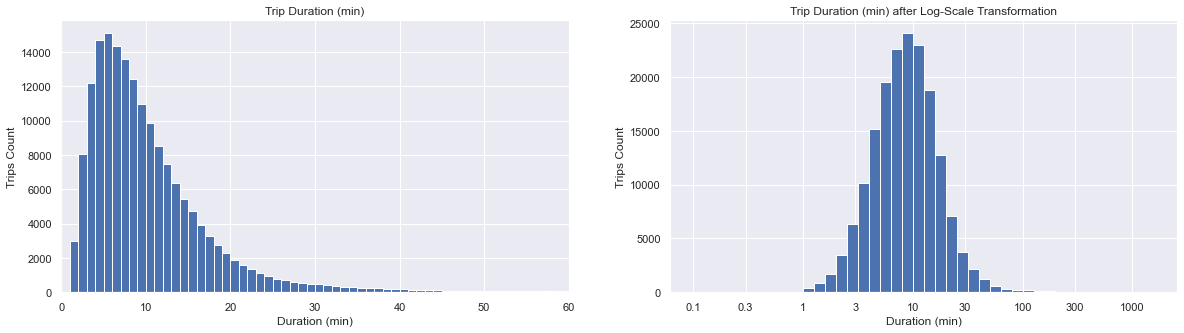

In [3]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
bins = np.arange(0, trips_clean['duration'].max()+1, 1)
plt.hist(data = trips_clean, x = 'duration', bins = bins)
plt.xlim([0,60]);
plt.xlabel('Duration (min)')
plt.ylabel('Trips Count')
plt.title("Trip Duration (min)");


plt.subplot(1, 2, 2)
bins = 10 ** np.arange(-1, np.log10(trips_clean['duration'].max())+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = trips_clean, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')
plt.ylabel('Trips Count')
plt.title('Trip Duration (min) after Log-Scale Transformation');

## Distribution of the Trips Start Day, Trips Start Hour
- The Day/Hour the users starting the trip is major factor that affecting the trip duration.
- the Trip Start day is in close range all days except week ends.
- the Trip Start hour has two peaks during 8am and 5pm and in the lowest range between 12am and 5am.

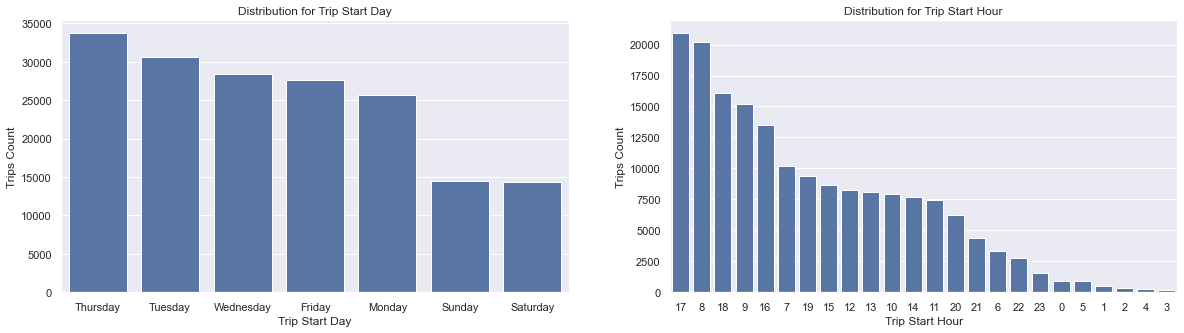

In [4]:
plt.figure(figsize = [20, 5])

# plotting distribution of days
plt.subplot(1, 2, 1)
sb.countplot(data=trips_clean , x='start_day',color=base_color , order=trips_clean['start_day'].value_counts().index)
plt.xlabel('Trip Start Day')
plt.ylabel('Trips Count')
plt.title('Distribution for Trip Start Day');

# plotting distribution of hours
plt.subplot(1, 2, 2) 
sb.countplot(data=trips_clean , x='start_hour',color=base_color , order=trips_clean['start_hour'].value_counts().index)
plt.xlabel('Trip Start Hour')
plt.ylabel('Trips Count')
plt.title('Distribution for Trip Start Hour');

## Distribution of the User Type 
- The Majority of users are subscribers and only 9.5% are Customers.

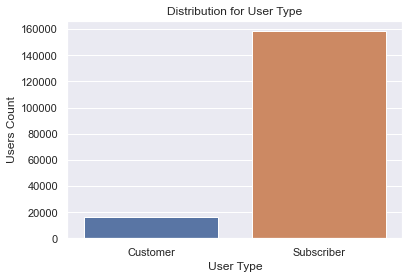

In [5]:
sb.countplot(data=trips_clean , x='user_type')
plt.xlabel('User Type')
plt.ylabel('Users Count')
plt.title('Distribution for User Type');

## the User Type vs. Trip Duration
- Customer users in average have longer trip than subscriber ones.
- Average trip duration for customers ~ 12 min vs ~ 9 min for Subcribers.

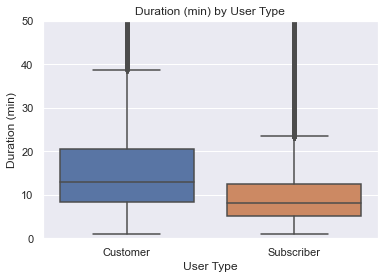

In [6]:
sb.boxplot(data=trips_clean, x='user_type', y='duration')
plt.ylim(0, 50);
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.title('Duration (min) by User Type');

## Trip duration By User Type For Different Genders
- Adding member gender confirms that in general Customers have longer trip duration than subscribers.
- it also adds information that on average, females have slightly longer trips than males.

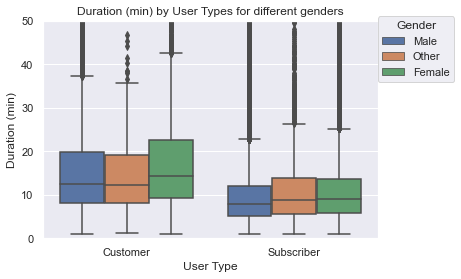

In [7]:
sb.boxplot(data= trips_clean, x = 'user_type', y= 'duration', hue= 'member_gender')
plt.ylim(0,50)
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.title('Duration (min) by User Types for different genders')
plt.legend(loc = [1,0.72], title= 'Gender');

## Trip duration By Start trip Day For Different Genders
- It seems that trip duration have close range for all days except weekends which haev little increase in the trip durations.
- the figure also shows that in general females have longer trip durations. 

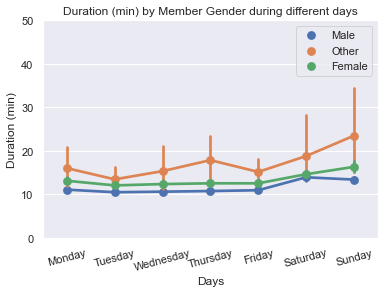

In [8]:
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data = trips_clean, x = 'start_day', y = 'duration', hue = 'member_gender',order=days_order)

plt.ylim(0,50)
plt.ylabel('Duration (min)')

plt.xticks(rotation=15)
plt.xlabel('Days');

plt.title('Duration (min) by Member Gender during different days')
plt.legend();

## In Summary :
- The Average trip Duration is ~ 9 min.
- the average trip distance after is ~ 1.58 km.
- The System have two user types ( 90.5% Subscribers and 9.5% Customers).
- Customers Users have longer trips than Subscribers.
    - On Average, For Customers ~12 min. and For Subscribers ~ 9 min.  
- The Majority of System Subscribers are Males (75% Males ,23% Females and 2% Other).
- Females have slightly longer trips than Male.
    - On Average, For Females ~ 10 min. and For Males ~9 min.
- There are two Peaks for Starting trip hour at 8am and 5pm.
- There are remarkable decrease in Starting trip in Weekends , and also increase in trip duration during weekends.
- Members Ages have no strong effect in trip duration.